In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from itertools import product
import plotly.graph_objects as go

## Task 1

In [5]:
def generate_group(x, p, f):
    if x[1] >= f(x[0]):
        return st.bernoulli.rvs(p)
    else:
        return st.bernoulli.rvs(1 - p)

# a) $y = x$

In [56]:
# generate example data
n = 200
x = st.uniform.rvs(size=(n, 2), loc=-5, scale=10)

p = 0.95
f = lambda x: x

y = np.apply_along_axis(arr=x, func1d=lambda y: generate_group(y, p, f), axis=1)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.89      0.91      0.90        55

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



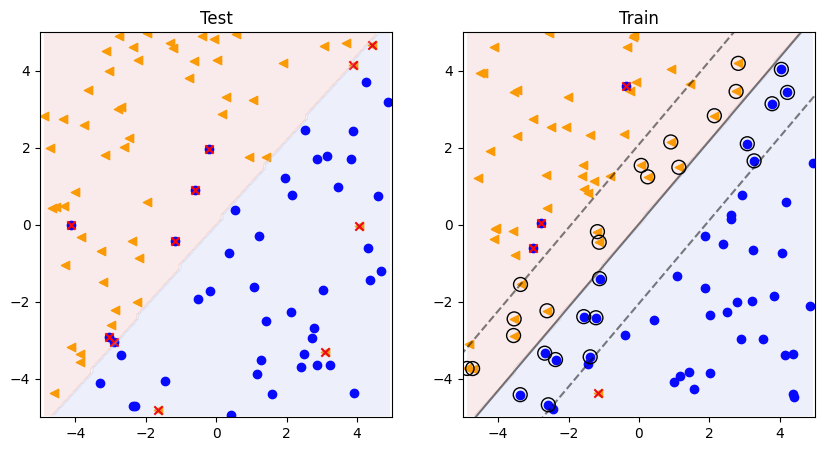

In [57]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

# fit 
clf = svm.SVC(kernel='poly', degree=1, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(y_test, y_pred, labels=[0, 1]))

# make grid for color parts of classification
h = 1 / 10
xx, yy = np.meshgrid(np.arange(min(x.T[0]), max(x.T[0]), h),
                     np.arange(min(x.T[1]), max(x.T[1]), h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# find support vectors
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Test')
plt.scatter(*X_test[y_test == 0].T, marker="o", c='b')
plt.scatter(*X_test[y_test == 1].T, marker="<", c='orange')
plt.scatter(*X_test[y_pred != y_test].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
plt.title('Train')
plt.scatter(*X_train[y_train == 0].T, marker="o", c='b')
plt.scatter(*X_train[y_train == 1].T, marker="<", c='orange')
plt.scatter(*X_train[y_pred_train != y_train].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        49
           1       0.89      0.98      0.93        51

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



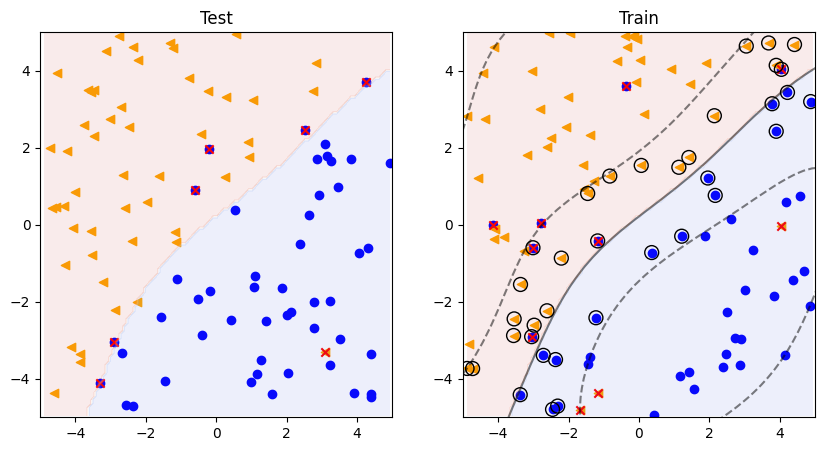

In [58]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

# fit 
clf = svm.SVC(kernel='rbf', degree=1, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(y_test, y_pred, labels=[0, 1]))

# make grid for color parts of classification
h = 1 / 10
xx, yy = np.meshgrid(np.arange(min(x.T[0]), max(x.T[0]), h),
                     np.arange(min(x.T[1]), max(x.T[1]), h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# find support vectors
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Test')
plt.scatter(*X_test[y_test == 0].T, marker="o", c='b')
plt.scatter(*X_test[y_test == 1].T, marker="<", c='orange')
plt.scatter(*X_test[y_pred != y_test].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
plt.title('Train')
plt.scatter(*X_train[y_train == 0].T, marker="o", c='b')
plt.scatter(*X_train[y_train == 1].T, marker="<", c='orange')
plt.scatter(*X_train[y_pred_train != y_train].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

# b) $y = x^2 - 5$

In [83]:
# generate example data
n = 200
x = st.uniform.rvs(size=(n, 2), loc=-5, scale=10)

p = 0.95
f = lambda x: x**2 - 5

y = np.apply_along_axis(arr=x, func1d=lambda y: generate_group(y, p, f), axis=1)

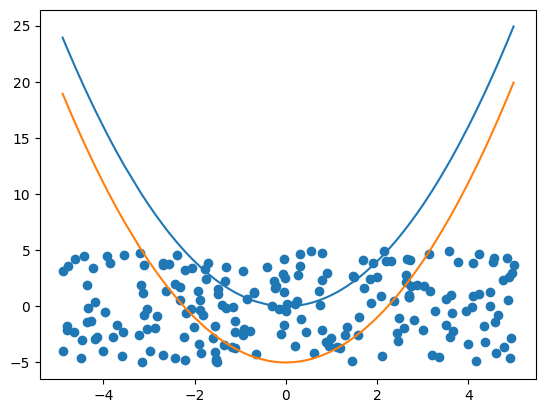

In [85]:
plt.scatter(*x.T)
x_ = np.array(sorted(x.T[0]))
y_ = x_**2
plt.plot(x_, y_)
plt.plot(x_, y_ - 5)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        55
           1       0.75      0.87      0.80        45

    accuracy                           0.81       100
   macro avg       0.81      0.82      0.81       100
weighted avg       0.82      0.81      0.81       100



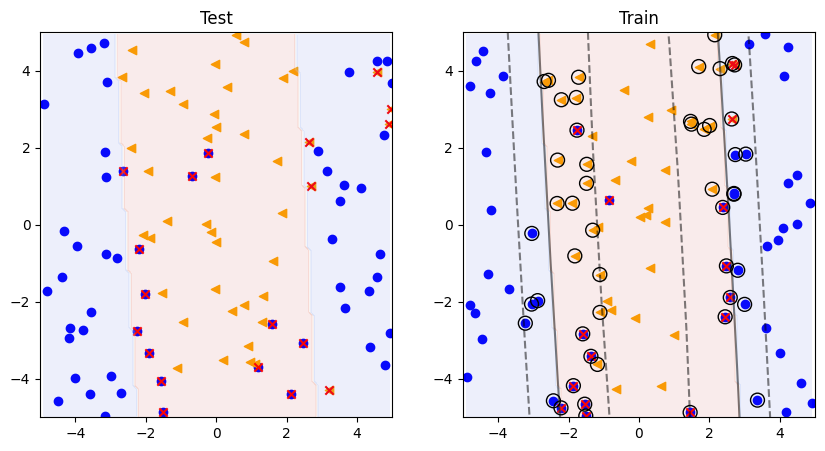

In [86]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

# fit 
clf = svm.SVC(kernel='poly', degree=2, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(y_test, y_pred, labels=[0, 1]))

# make grid for color parts of classification
h = 1 / 10
xx, yy = np.meshgrid(np.arange(min(x.T[0]), max(x.T[0]), h),
                     np.arange(min(x.T[1]), max(x.T[1]), h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# find support vectors
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Test')
plt.scatter(*X_test[y_test == 0].T, marker="o", c='b')
plt.scatter(*X_test[y_test == 1].T, marker="<", c='orange')
plt.scatter(*X_test[y_pred != y_test].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
plt.title('Train')
plt.scatter(*X_train[y_train == 0].T, marker="o", c='b')
plt.scatter(*X_train[y_train == 1].T, marker="<", c='orange')
plt.scatter(*X_train[y_pred_train != y_train].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        57
           1       0.77      0.93      0.84        43

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.87      0.85      0.85       100



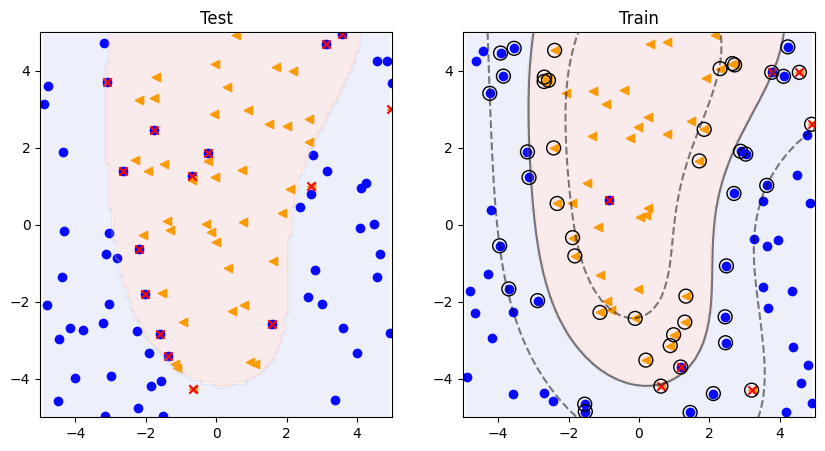

In [87]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

# fit 
clf = svm.SVC(kernel='rbf', degree=1, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(y_test, y_pred, labels=[0, 1]))

# make grid for color parts of classification
h = 1 / 10
xx, yy = np.meshgrid(np.arange(min(x.T[0]), max(x.T[0]), h),
                     np.arange(min(x.T[1]), max(x.T[1]), h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# find support vectors
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Test')
plt.scatter(*X_test[y_test == 0].T, marker="o", c='b')
plt.scatter(*X_test[y_test == 1].T, marker="<", c='orange')
plt.scatter(*X_test[y_pred != y_test].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
plt.title('Train')
plt.scatter(*X_train[y_train == 0].T, marker="o", c='b')
plt.scatter(*X_train[y_train == 1].T, marker="<", c='orange')
plt.scatter(*X_train[y_pred_train != y_train].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

# c) $y = exp(-x^2)$

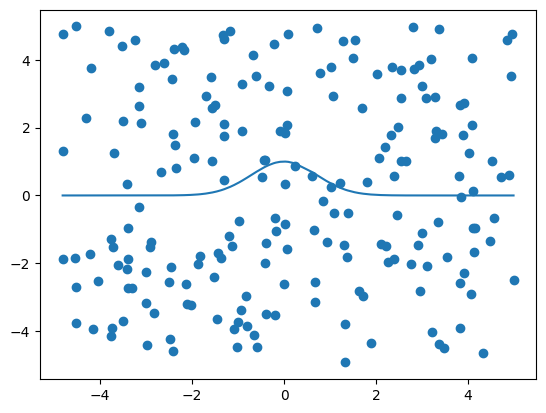

In [88]:
# generate example data
n = 200
x = st.uniform.rvs(size=(n, 2), loc=-5, scale=10)

p = 0.95
f = lambda x: np.exp(-x**2)

y = np.apply_along_axis(arr=x, func1d=lambda y: generate_group(y, p, f), axis=1)

plt.scatter(*x.T)
x_ = np.array(sorted(x.T[0]))
y_ = np.exp(- x_**2)
plt.plot(x_, y_)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        43
           1       1.00      0.75      0.86        57

    accuracy                           0.86       100
   macro avg       0.88      0.88      0.86       100
weighted avg       0.89      0.86      0.86       100



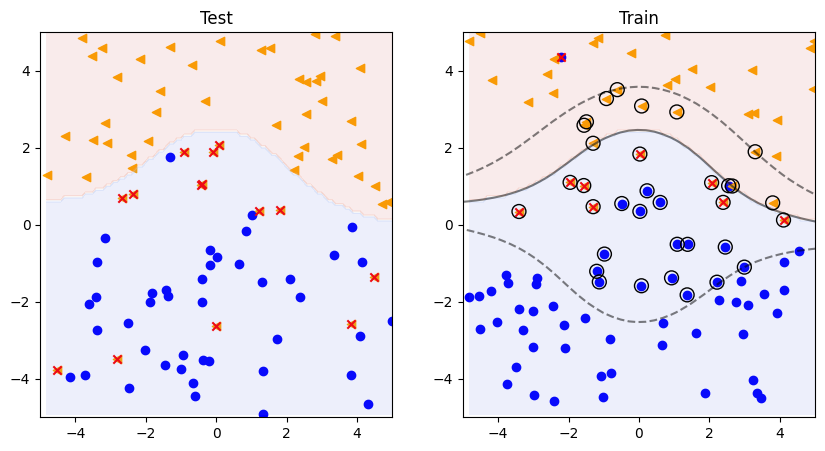

In [89]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

# fit 
clf = svm.SVC(kernel='poly', degree=3, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(y_test, y_pred, labels=[0, 1]))

# make grid for color parts of classification
h = 1 / 10
xx, yy = np.meshgrid(np.arange(min(x.T[0]), max(x.T[0]), h),
                     np.arange(min(x.T[1]), max(x.T[1]), h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# find support vectors
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Test')
plt.scatter(*X_test[y_test == 0].T, marker="o", c='b')
plt.scatter(*X_test[y_test == 1].T, marker="<", c='orange')
plt.scatter(*X_test[y_pred != y_test].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
plt.title('Train')
plt.scatter(*X_train[y_train == 0].T, marker="o", c='b')
plt.scatter(*X_train[y_train == 1].T, marker="<", c='orange')
plt.scatter(*X_train[y_pred_train != y_train].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        50
           1       0.89      0.94      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



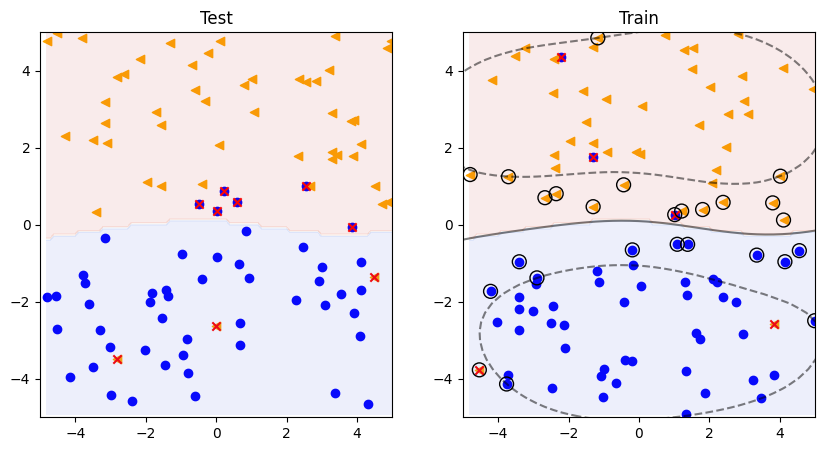

In [90]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

# fit 
clf = svm.SVC(kernel='rbf', degree=1, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(y_test, y_pred, labels=[0, 1]))

# make grid for color parts of classification
h = 1 / 10
xx, yy = np.meshgrid(np.arange(min(x.T[0]), max(x.T[0]), h),
                     np.arange(min(x.T[1]), max(x.T[1]), h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# find support vectors
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Test')
plt.scatter(*X_test[y_test == 0].T, marker="o", c='b')
plt.scatter(*X_test[y_test == 1].T, marker="<", c='orange')
plt.scatter(*X_test[y_pred != y_test].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
plt.title('Train')
plt.scatter(*X_train[y_train == 0].T, marker="o", c='b')
plt.scatter(*X_train[y_train == 1].T, marker="<", c='orange')
plt.scatter(*X_train[y_pred_train != y_train].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

# d) $y = sin(2x)$

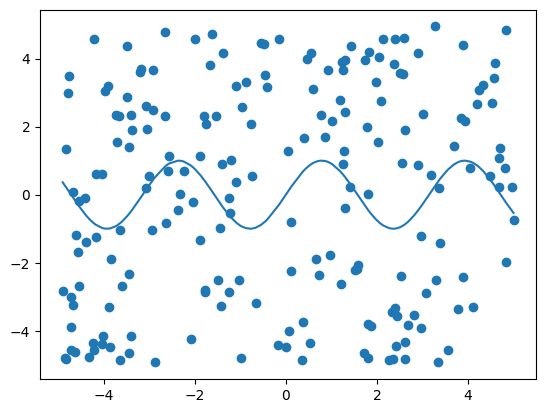

In [91]:
# generate example data
n = 200
x = st.uniform.rvs(size=(n, 2), loc=-5, scale=10)

p = 0.95
f = lambda x: np.sin(2 * x)

y = np.apply_along_axis(arr=x, func1d=lambda y: generate_group(y, p, f), axis=1)

plt.scatter(*x.T)
x_ = np.array(sorted(x.T[0]))
y_ = np.sin(2 * x_)
plt.plot(x_, y_)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        49
           1       0.86      0.94      0.90        51

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



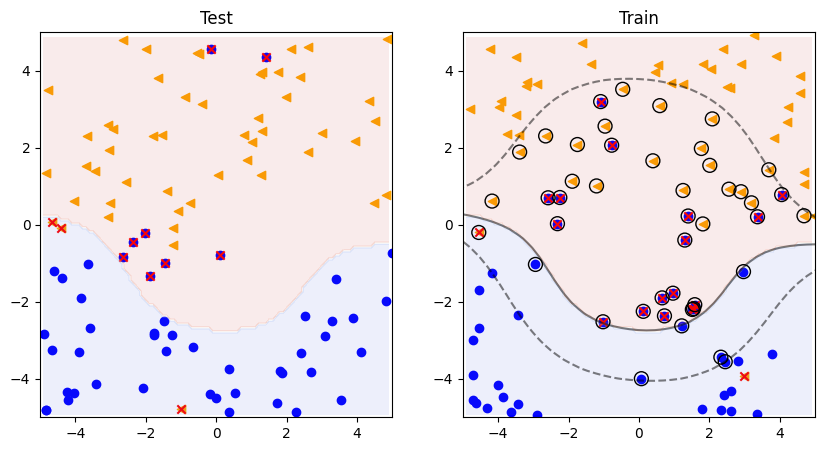

In [94]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

# fit 
clf = svm.SVC(kernel='poly', degree=5, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(y_test, y_pred, labels=[0, 1]))

# make grid for color parts of classification
h = 1 / 10
xx, yy = np.meshgrid(np.arange(min(x.T[0]), max(x.T[0]), h),
                     np.arange(min(x.T[1]), max(x.T[1]), h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# find support vectors
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Test')
plt.scatter(*X_test[y_test == 0].T, marker="o", c='b')
plt.scatter(*X_test[y_test == 1].T, marker="<", c='orange')
plt.scatter(*X_test[y_pred != y_test].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
plt.title('Train')
plt.scatter(*X_train[y_train == 0].T, marker="o", c='b')
plt.scatter(*X_train[y_train == 1].T, marker="<", c='orange')
plt.scatter(*X_train[y_pred_train != y_train].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        54
           1       0.86      0.93      0.90        46

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



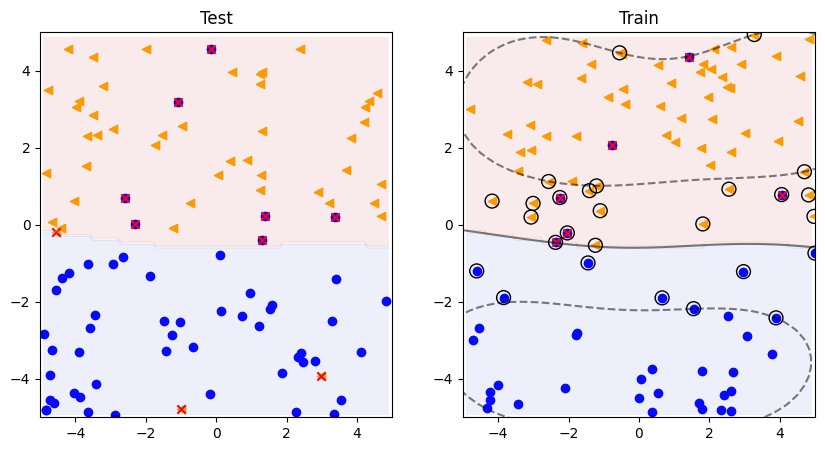

In [95]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

# fit 
clf = svm.SVC(kernel='rbf', degree=1, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(y_test, y_pred, labels=[0, 1]))

# make grid for color parts of classification
h = 1 / 10
xx, yy = np.meshgrid(np.arange(min(x.T[0]), max(x.T[0]), h),
                     np.arange(min(x.T[1]), max(x.T[1]), h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# find support vectors
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Test')
plt.scatter(*X_test[y_test == 0].T, marker="o", c='b')
plt.scatter(*X_test[y_test == 1].T, marker="<", c='orange')
plt.scatter(*X_test[y_pred != y_test].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
plt.title('Train')
plt.scatter(*X_train[y_train == 0].T, marker="o", c='b')
plt.scatter(*X_train[y_train == 1].T, marker="<", c='orange')
plt.scatter(*X_train[y_pred_train != y_train].T, marker="x", c='r')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

# Task 2

In [100]:
data = load_breast_cancer()
X = data['data']
y = data['target']
feature_names = data['feature_names']
target_names = data['target_names']


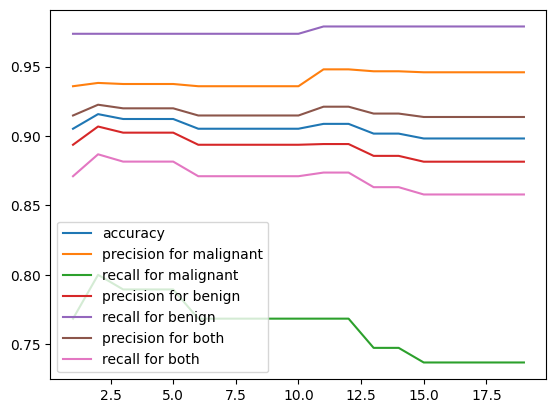

In [120]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
degrees = range(1, 20)
accuracy = []
prec_0 = []
rec_0 = []
prec_1 = []
rec_1 = []
prec_macro = []
rec_macro = []

for d in degrees:
    # fit 
    clf = svm.SVC(kernel='poly', degree=d, C=0.5)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    rep = classification_report(y_test, y_pred, labels=[0, 1], output_dict=True)

    accuracy.append(rep['accuracy'])

    prec_0.append(rep['0']['precision'])
    rec_0.append(rep['0']['recall'])

    prec_1.append(rep['1']['precision'])
    rec_1.append(rep['1']['recall'])

    prec_macro.append(rep['macro avg']['precision'])
    rec_macro.append(rep['macro avg']['recall'])

plt.plot(degrees, accuracy,
         degrees, prec_0,
         degrees, rec_0, 
         degrees, prec_1,
         degrees, rec_1,
         degrees, prec_macro,
         degrees, rec_macro)
plt.legend(['accuracy', f'precision for {target_names[0]}', f'recall for {target_names[0]}',
            f'precision for {target_names[1]}', f'recall for {target_names[1]}',
            f'precision for both', f'recall for both'])


# Task 3

In [2]:
df = pd.read_csv('./datasets/spam.txt', sep=' ', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
X = df[[i for i in range(57)]].to_numpy()
y = df[57].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

In [60]:
accuracy = []
macro_rec = []
macro_prec = []

C_range = np.arange(40, 100, 1)
gamma_range = np.arange(0.0005, 0.01, 0.0005)

combo = []


for i in tqdm(range(len(C_range))):
    for j in tqdm(range(len(gamma_range))):
        clf = svm.SVC(kernel='rbf', C=C_range[i], gamma=gamma_range[j])
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        combo.append(str(C_range[i]) + ' ' + str(gamma_range[j]))
        accuracy.append(classification_report(y_test, y_pred, labels=[0, 1], output_dict=True, zero_division=0)['accuracy'])
        macro_rec.append(classification_report(y_test, y_pred, labels=[0, 1], output_dict=True, zero_division=0)['macro avg']['recall'])
        macro_prec.append(classification_report(y_test, y_pred, labels=[0, 1], output_dict=True, zero_division=0)['macro avg']['precision'])

100%|██████████| 60/60 [09:58<00:00,  9.98s/it]


In [64]:
fig = go.Figure(data=[go.Surface(y=C_range, x=gamma_range, z=np.array(macro_prec).reshape((len(C_range), len(gamma_range))))])

fig.update_layout(autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [65]:
fig = go.Figure(data=[go.Surface(y=C_range, x=gamma_range, z=np.array(macro_rec).reshape((len(C_range), len(gamma_range))))])

fig.update_layout(autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [66]:
fig = go.Figure(data=[go.Surface(y=C_range, x=gamma_range, z=np.array(accuracy).reshape((len(C_range), len(gamma_range))))])

fig.update_layout(autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [39]:
np.array(accuracy).reshape((10, 10))

array([[0.60147762, 0.60147762, 0.60147762, 0.60147762, 0.60147762,
        0.60147762, 0.60147762, 0.60147762, 0.60147762, 0.60147762],
       [0.70230335, 0.67057801, 0.6640591 , 0.66318992, 0.66362451,
        0.66232073, 0.66145154, 0.66145154, 0.66101695, 0.66058236],
       [0.73359409, 0.68970013, 0.68535419, 0.67188179, 0.66970882,
        0.66883963, 0.66840504, 0.66797045, 0.66797045, 0.66797045],
       [0.73533246, 0.69013472, 0.68752716, 0.67883529, 0.6714472 ,
        0.66970882, 0.66883963, 0.66840504, 0.66797045, 0.66797045],
       [0.73402868, 0.69013472, 0.68752716, 0.67883529, 0.6714472 ,
        0.66970882, 0.66883963, 0.66840504, 0.66797045, 0.66797045],
       [0.73402868, 0.69013472, 0.68752716, 0.67883529, 0.6714472 ,
        0.66970882, 0.66883963, 0.66840504, 0.66797045, 0.66797045],
       [0.73359409, 0.69013472, 0.68752716, 0.67883529, 0.6714472 ,
        0.66970882, 0.66883963, 0.66840504, 0.66797045, 0.66797045],
       [0.73359409, 0.69013472, 0.6875271

In [132]:
# fit 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1388
           1       0.94      0.91      0.93       913

    accuracy                           0.94      2301
   macro avg       0.94      0.94      0.94      2301
weighted avg       0.94      0.94      0.94      2301

